# EDA (Exploratory Data Analysis)

- Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques and statistical techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

**Steps involved in EDA**
1. Describing the data
2. Data cleaning
3. Imputation techniques
4. Data analysis and visualization
5. Transformations
6. Auto EDA

**Import data and data description**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/amrutagavhane/Weather_Report/main/weather_report.csv',index_col=0)
df

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1     41.0    190.0   7.4     67     5    1  2010    67       S
2     36.0    118.0   8.0     72     5    2  2010    72       C
3     12.0    149.0  12.6     74     5    3  2010    74      PS
4     18.0    313.0  11.5     62     5    4  2010    62       S
5      NaN      NaN  14.3     56     5    5  2010    56       S
..     ...      ...   ...    ...   ...  ...   ...   ...     ...
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 9 columns]

In [4]:
df.describe().T

count         mean        std     min     25%     50%       75%  \
Ozone    120.0    41.583333  32.620709     1.0    18.0    30.5    61.500   
Solar.R  151.0   185.403974  88.723103     7.0   119.0   197.0   257.000   
Wind     158.0     9.957595   3.511261     1.7     7.4     9.7    11.875   
Day      158.0    16.006329   8.997166     1.0     8.0    16.0    24.000   
Year     158.0  2010.000000   0.000000  2010.0  2010.0  2010.0  2010.000   
Temp     158.0    77.727848   9.377877    56.0    72.0    78.5    84.000   

            max  
Ozone     168.0  
Solar.R   334.0  
Wind       20.7  
Day        31.0  
Year     2010.0  
Temp       97.0

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    object 
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int64(3), object(3)
memory usage: 12.3+ KB


In [6]:
df['Weather'].value_counts()

S     59
C     49
PS    47
Name: Weather, dtype: int64

- As we can see that,
- 'Month' and 'Temp c' columns have all the numeric data still python has shown us that it is object.
- We will have to find out the reason and change the data type of these 2 columns.

# **Data type conversion**

In [7]:
df['Month'].unique()

array(['5', 'May', '6', '7', '8', '9'], dtype=object)

In [8]:
df['Temp C'].unique()

array(['67', '72', '74', '62', '56', '66', '65', '59', '61', '69', 'C',
       '68', '58', '64', '57', '73', '81', '79', '76', '78', '84', '85',
       '82', '87', '90', '93', '92', '80', '77', '75', '83', '88', '89',
       '91', '86', '97', '94', '96', '71', '63', '70'], dtype=object)

**There are 2 ways by which we can convert the data type of these 2 columns**
- By using replace method.
- By using pandas built in functions.

In [9]:
#Replace method

In [10]:
df['Month'].replace('May','5',inplace=True)

In [11]:
df['Month'] = df['Month'].astype(int)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   158 non-null    object 
 4   Month    158 non-null    int32  
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(3), int32(1), int64(3), object(2)
memory usage: 11.7+ KB


In [13]:
#Using pandas built in functions

In [14]:
df['Temp C'] = pd.to_numeric(df['Temp C'],errors='coerce')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158 entries, 1 to 158
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    120 non-null    float64
 1   Solar.R  151 non-null    float64
 2   Wind     158 non-null    float64
 3   Temp C   157 non-null    float64
 4   Month    158 non-null    int32  
 5   Day      158 non-null    int64  
 6   Year     158 non-null    int64  
 7   Temp     158 non-null    int64  
 8   Weather  155 non-null    object 
dtypes: float64(4), int32(1), int64(3), object(1)
memory usage: 11.7+ KB


# Duplicates

In [16]:
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
154    False
155    False
156    False
157     True
158    False
Length: 158, dtype: bool

In [17]:
df.duplicated().sum()

1

In [18]:
#Print the duplicated values

In [19]:
df[df.duplicated()]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [20]:
#Get all the duplicate values.
#2 Approaches

In [21]:
df[(df['Ozone'] == 14.0) & (df['Day']==28)]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [22]:
df[df.duplicated(keep=False)]

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
151   14.0    191.0  14.3    75.0      9   28  2010    75       S
157   14.0    191.0  14.3    75.0      9   28  2010    75       S

In [23]:
#Drop Duplicated records

In [24]:
df.drop_duplicates(inplace=True)

In [25]:
df.duplicated().sum()

0

In [26]:
df.shape

(157, 9)

# Drop columns

- There is one column which only has single different value.
- We need to get rid of all the uneccesary columns or else it will be very complex data.

In [27]:
df.head()

Ozone  Solar.R  Wind  Temp C  Month  Day  Year  Temp Weather
1   41.0    190.0   7.4    67.0      5    1  2010    67       S
2   36.0    118.0   8.0    72.0      5    2  2010    72       C
3   12.0    149.0  12.6    74.0      5    3  2010    74      PS
4   18.0    313.0  11.5    62.0      5    4  2010    62       S
5    NaN      NaN  14.3    56.0      5    5  2010    56       S

In [28]:
df.drop(columns=['Temp C','Year'],inplace=True)

In [29]:
df.head()

Ozone  Solar.R  Wind  Month  Day  Temp Weather
1   41.0    190.0   7.4      5    1    67       S
2   36.0    118.0   8.0      5    2    72       C
3   12.0    149.0  12.6      5    3    74      PS
4   18.0    313.0  11.5      5    4    62       S
5    NaN      NaN  14.3      5    5    56       S

# Rename the columns

In [30]:
df.rename(columns={'Solar.R':'Solar'},inplace=True)

In [31]:
df

Ozone  Solar  Wind  Month  Day  Temp Weather
1     41.0  190.0   7.4      5    1    67       S
2     36.0  118.0   8.0      5    2    72       C
3     12.0  149.0  12.6      5    3    74      PS
4     18.0  313.0  11.5      5    4    62       S
5      NaN    NaN  14.3      5    5    56       S
..     ...    ...   ...    ...  ...   ...     ...
153   20.0  223.0  11.5      9   30    68       S
154   41.0  190.0   7.4      5    1    67       C
155   30.0  193.0   6.9      9   26    70      PS
156    NaN  145.0  13.2      9   27    77       S
158   18.0  131.0   8.0      9   29    76       C

[157 rows x 7 columns]

# Missing value imputation

- In dataset, missing data, or missing values, occur when no data value is stored for the variable in an observation.
- Missing data are a common occurrence and can have a significant effect on the conclusions that can be drawn from the data.
- If we don't impute or handle null values, we will not be able to create a machine learning model as python does not understand missing values.
- Handling missing values is a crucial step in EDA.
- Missing values can appear for several reasons like:
    - Incomplete data entry
    - Issues with machines
    - Improper handling of data
    - And many more.
         

In [32]:
#Checking null values

In [33]:
df.isna()

Ozone  Solar   Wind  Month    Day   Temp  Weather
1    False  False  False  False  False  False    False
2    False  False  False  False  False  False    False
3    False  False  False  False  False  False    False
4    False  False  False  False  False  False    False
5     True   True  False  False  False  False    False
..     ...    ...    ...    ...    ...    ...      ...
153  False  False  False  False  False  False    False
154  False  False  False  False  False  False    False
155  False  False  False  False  False  False    False
156   True  False  False  False  False  False    False
158  False  False  False  False  False  False    False

[157 rows x 7 columns]

In [34]:
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [35]:
#Visualizing missing values

<AxesSubplot:>

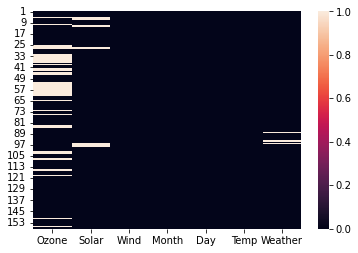

In [36]:
sns.heatmap(df.isna())

# Rules for missing value imputation:
1. If missing values are present between 3-5%, drop na.
2. If missings values are between 5-50%, fill the missinga values.
3. If missing values > 50%, drop the column.

In [37]:
#Calculate the percentage of missig values in each column.
df.isna().sum()

Ozone      38
Solar       7
Wind        0
Month       0
Day         0
Temp        0
Weather     3
dtype: int64

In [38]:
for i in df.isna().sum():
    print(f"Missing values are: {i/len(df)*100}")

Missing values are: 24.203821656050955
Missing values are: 4.45859872611465
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 0.0
Missing values are: 1.910828025477707


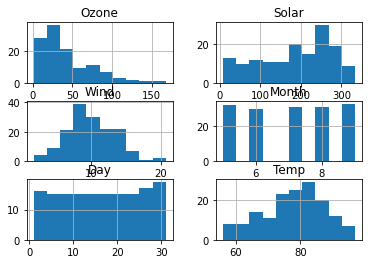

In [39]:
df.hist()
plt.show()

In [40]:
ozone_median = df['Ozone'].median()
ozone_median

31.0

In [41]:
df['Ozone'].fillna(ozone_median,inplace=True)

In [42]:
df['Solar'].fillna(df['Solar'].median(),inplace=True)

In [43]:
df['Weather'].mode()

0    S
dtype: object

In [44]:
df['Weather'].value_counts()

S     58
C     49
PS    47
Name: Weather, dtype: int64

In [45]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Temp       0
Weather    3
dtype: int64

In [46]:
df['Weather'].fillna(df['Weather'].mode()[0],inplace=True)

In [47]:
df.isna().sum()

Ozone      0
Solar      0
Wind       0
Month      0
Day        0
Temp       0
Weather    0
dtype: int64

# Outlier detection

- There are multiple approaches to detect outliers in the dataset.
    - Histogram
    - Boxplot
    - Descriptive stats for df

In [48]:
plt.rcParams['figure.figsize']  = (10,5)
plt.rcParams['figure.dpi'] = 250

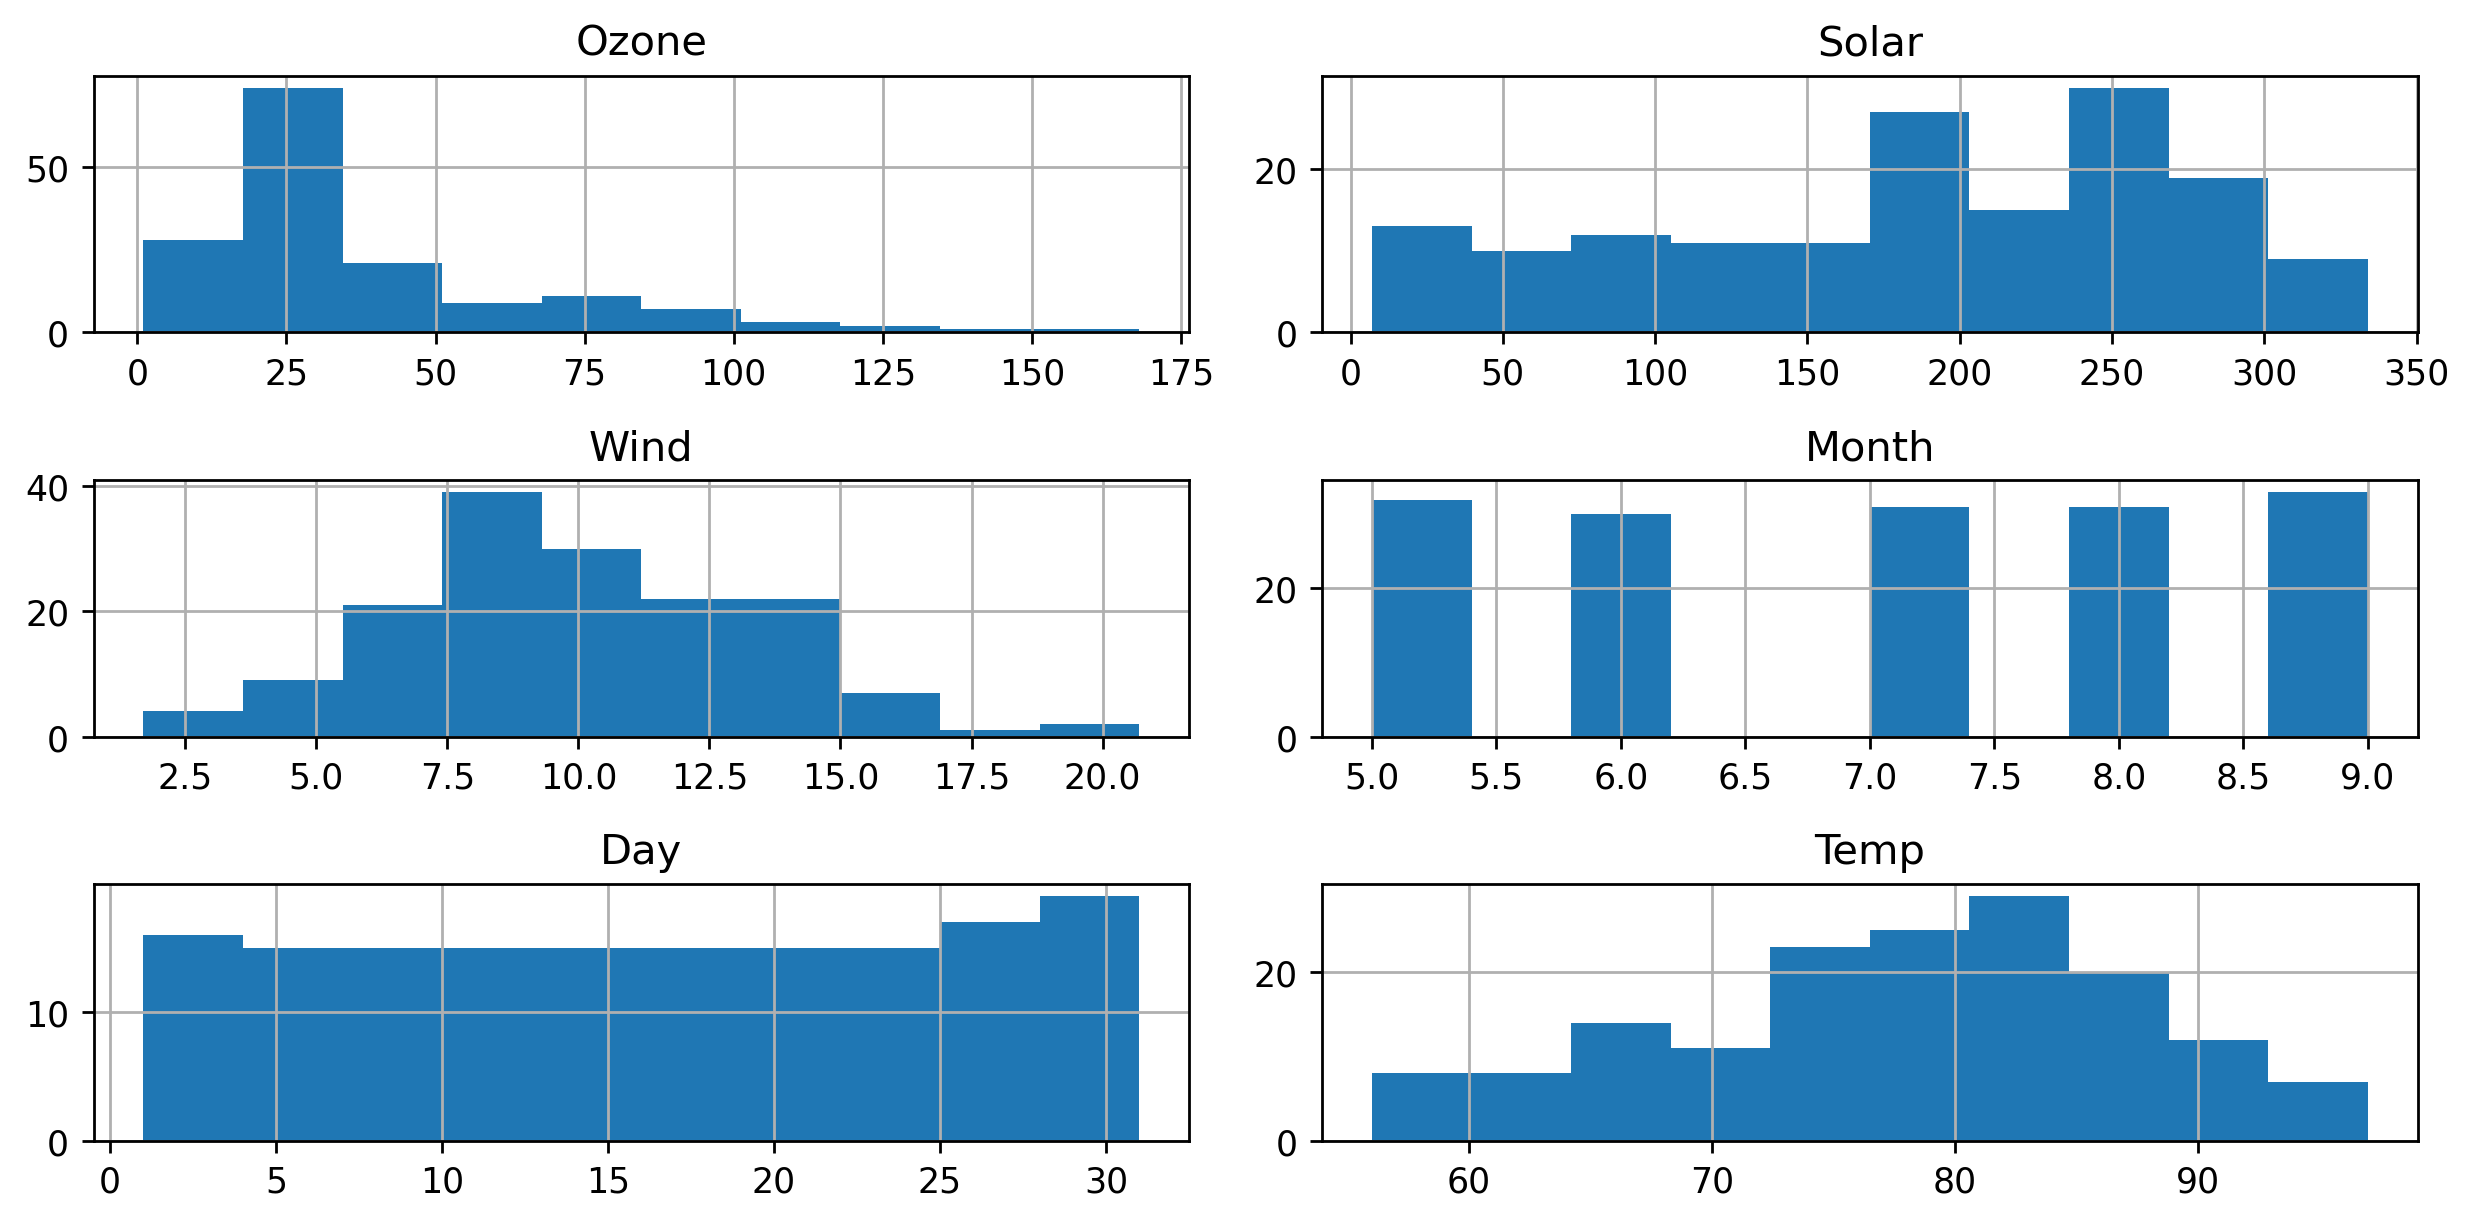

In [49]:
df.hist()
plt.tight_layout()

<AxesSubplot:>

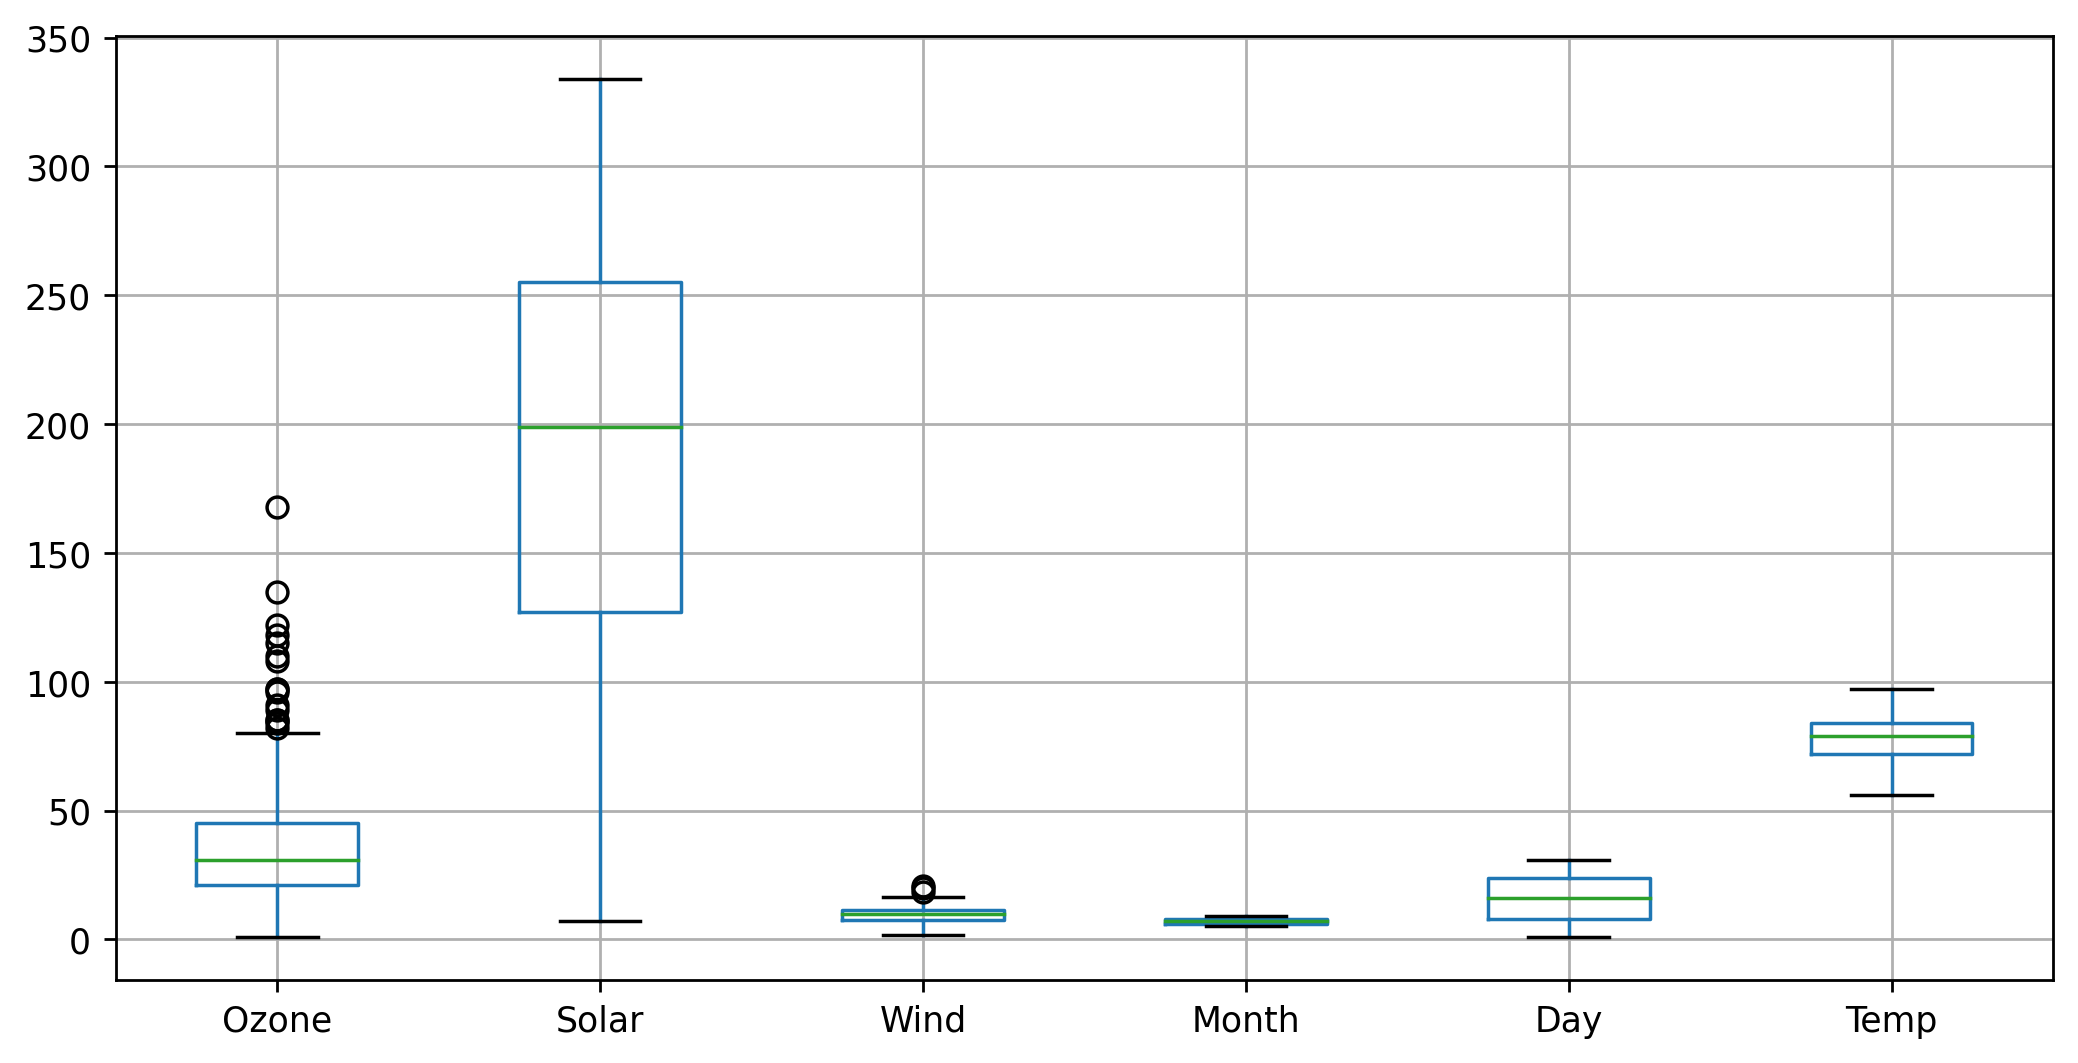

In [50]:
df.boxplot()

In [51]:
#Outlier detection function

In [52]:
df

Ozone  Solar  Wind  Month  Day  Temp Weather
1     41.0  190.0   7.4      5    1    67       S
2     36.0  118.0   8.0      5    2    72       C
3     12.0  149.0  12.6      5    3    74      PS
4     18.0  313.0  11.5      5    4    62       S
5     31.0  199.0  14.3      5    5    56       S
..     ...    ...   ...    ...  ...   ...     ...
153   20.0  223.0  11.5      9   30    68       S
154   41.0  190.0   7.4      5    1    67       C
155   30.0  193.0   6.9      9   26    70      PS
156   31.0  145.0  13.2      9   27    77       S
158   18.0  131.0   8.0      9   29    76       C

[157 rows x 7 columns]

In [53]:
def outlier_detection(df,col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3-q1
    
    upper = q3+(1.5*iqr)
    lower = q1-(1.5*iqr)
    
    return lower,upper  

In [54]:
outlier_detection(df,'Ozone')

(-15.0, 81.0)

In [55]:
outlier_detection(df,'Wind')

(1.2500000000000009, 17.65)

In [56]:
#Capping Outliers

In [57]:
df[df['Ozone'] > 81.0]

Ozone  Solar  Wind  Month  Day  Temp Weather
30   115.0  223.0   5.7      5   30    79       C
62   135.0  269.0   4.1      7    1    84       S
69    97.0  267.0   6.3      7    8    92      PS
70    97.0  272.0   5.7      7    9    92       C
71    85.0  175.0   7.4      7   10    89      PS
86   108.0  223.0   8.0      7   25    85      PS
89    82.0  213.0   7.4      7   28    88       S
99   122.0  255.0   4.0      8    7    89       C
100   89.0  229.0  10.3      8    8    90      PS
101  110.0  207.0   8.0      8    9    90       C
117  168.0  238.0   3.4      8   25    81      PS
121  118.0  225.0   2.3      8   29    94       S
122   84.0  237.0   6.3      8   30    96       S
123   85.0  188.0   6.3      8   31    94       C
124   96.0  167.0   6.9      9    1    91       C
127   91.0  189.0   4.6      9    4    93      PS

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157 entries, 1 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    157 non-null    float64
 1   Solar    157 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    157 non-null    int32  
 4   Day      157 non-null    int64  
 5   Temp     157 non-null    int64  
 6   Weather  157 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(1)
memory usage: 9.2+ KB


In [59]:
df.loc[df['Ozone'] > 81.0,'Ozone'] = 81.0

In [60]:
df.loc[df['Wind']> 17.65,'Wind'] = 17.65

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Ozone'>

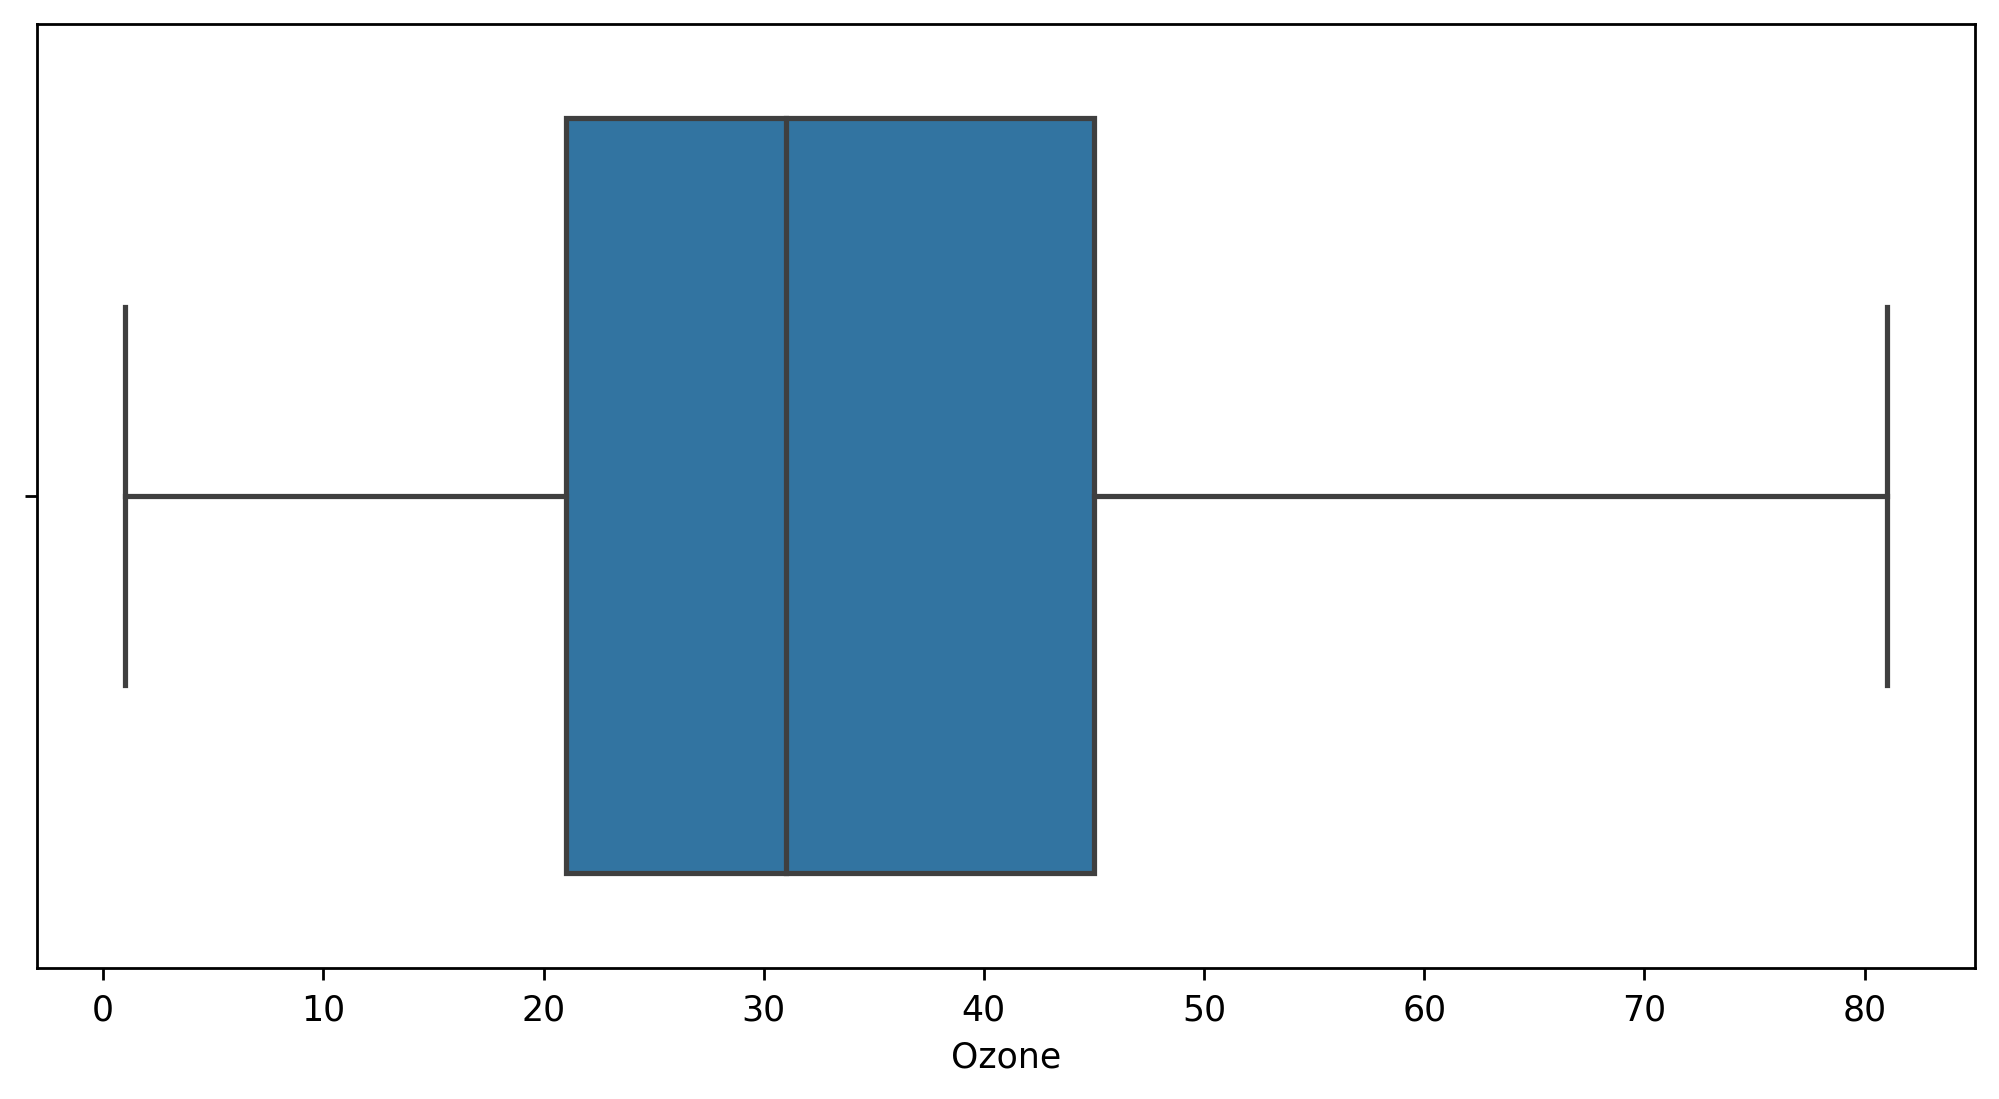

In [61]:
sns.boxplot(df['Ozone'])

In [62]:
df

Ozone  Solar  Wind  Month  Day  Temp Weather
1     41.0  190.0   7.4      5    1    67       S
2     36.0  118.0   8.0      5    2    72       C
3     12.0  149.0  12.6      5    3    74      PS
4     18.0  313.0  11.5      5    4    62       S
5     31.0  199.0  14.3      5    5    56       S
..     ...    ...   ...    ...  ...   ...     ...
153   20.0  223.0  11.5      9   30    68       S
154   41.0  190.0   7.4      5    1    67       C
155   30.0  193.0   6.9      9   26    70      PS
156   31.0  145.0  13.2      9   27    77       S
158   18.0  131.0   8.0      9   29    76       C

[157 rows x 7 columns]

In [63]:
df['Weather'].value_counts()

S     61
C     49
PS    47
Name: Weather, dtype: int64

In [64]:
df[df['Wind'] > 17.65] = 17.65

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Wind'>

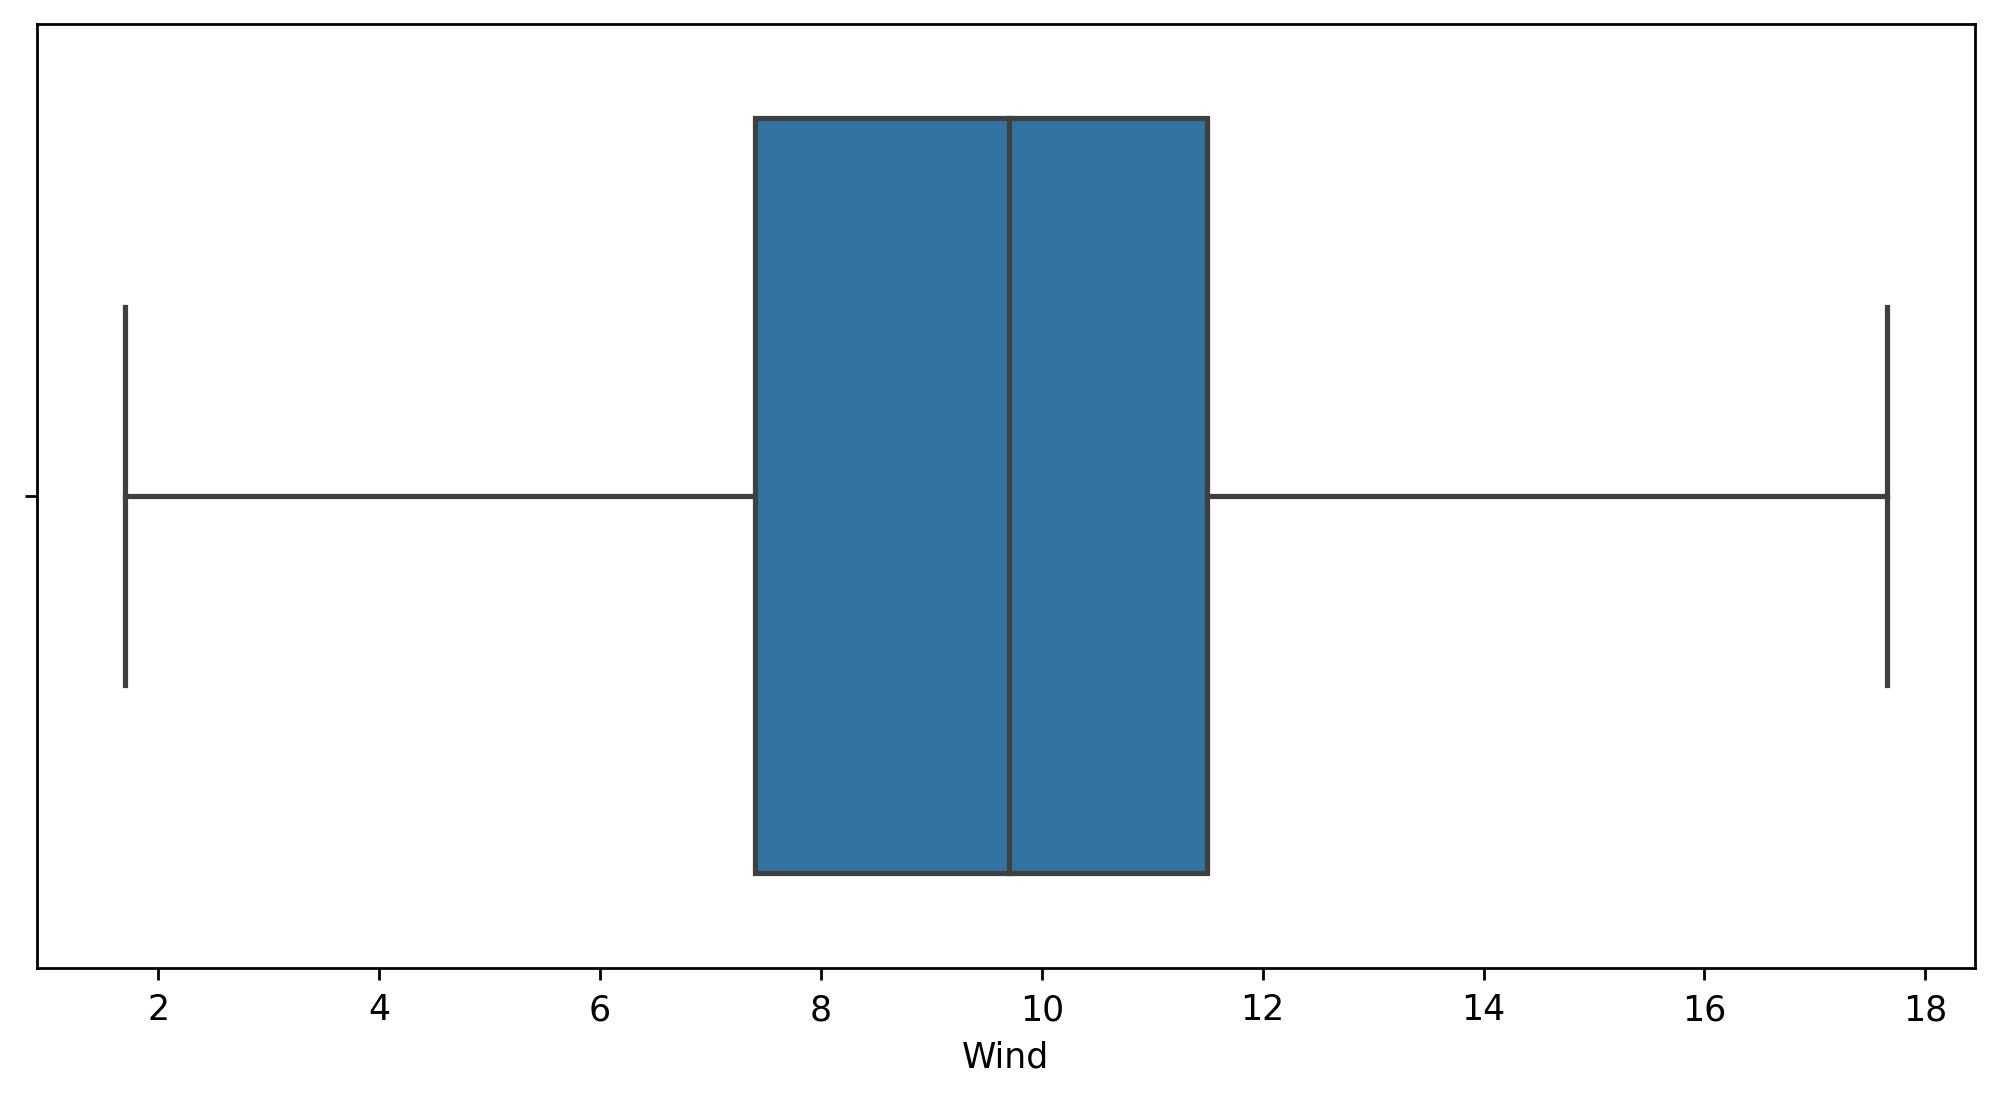

In [65]:
sns.boxplot(df['Wind'])

<AxesSubplot:>

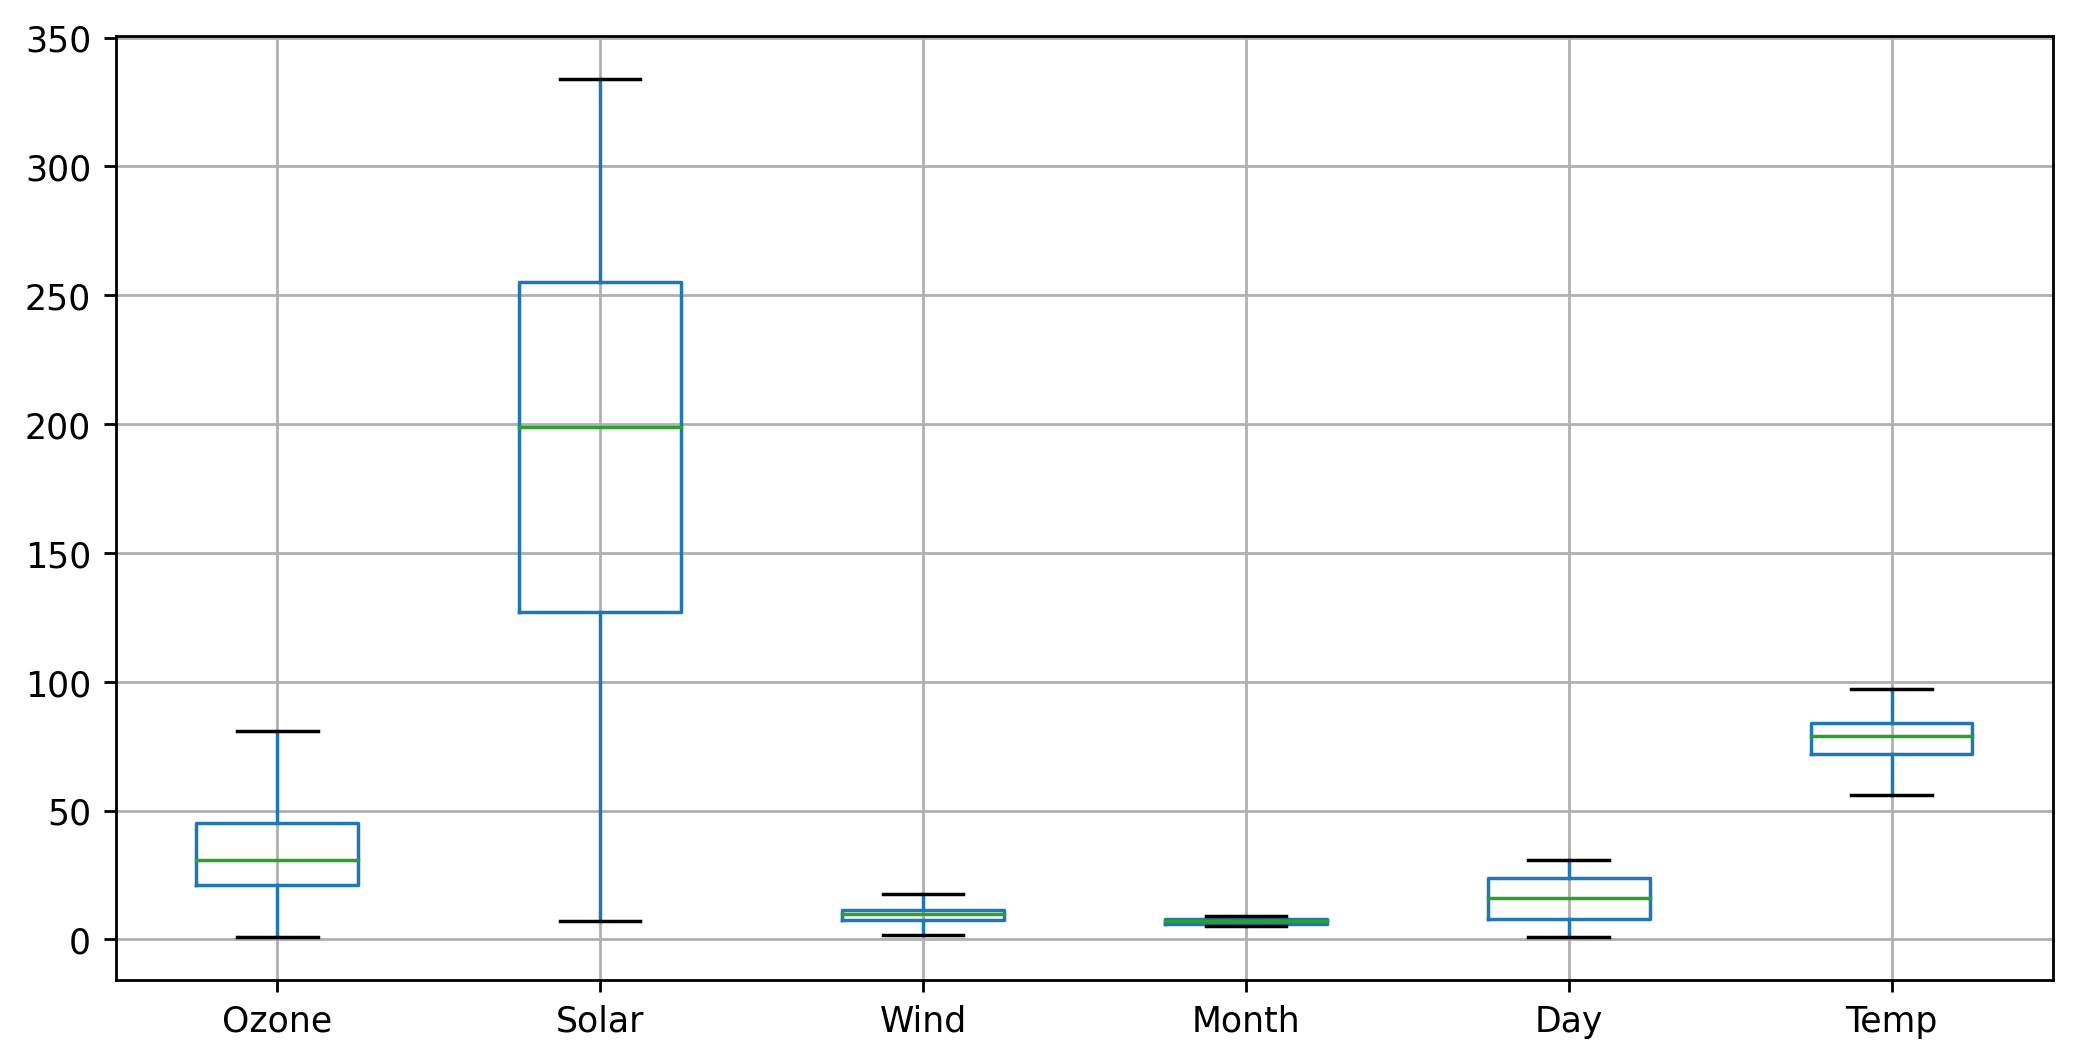

In [66]:
df.boxplot()

In [67]:
df.shape

(157, 7)

# Scatter Plot and Correlation

In [68]:
df.head()

Ozone  Solar  Wind  Month  Day  Temp Weather
1   41.0  190.0   7.4    5.0  1.0  67.0       S
2   36.0  118.0   8.0    5.0  2.0  72.0       C
3   12.0  149.0  12.6    5.0  3.0  74.0      PS
4   18.0  313.0  11.5    5.0  4.0  62.0       S
5   31.0  199.0  14.3    5.0  5.0  56.0       S

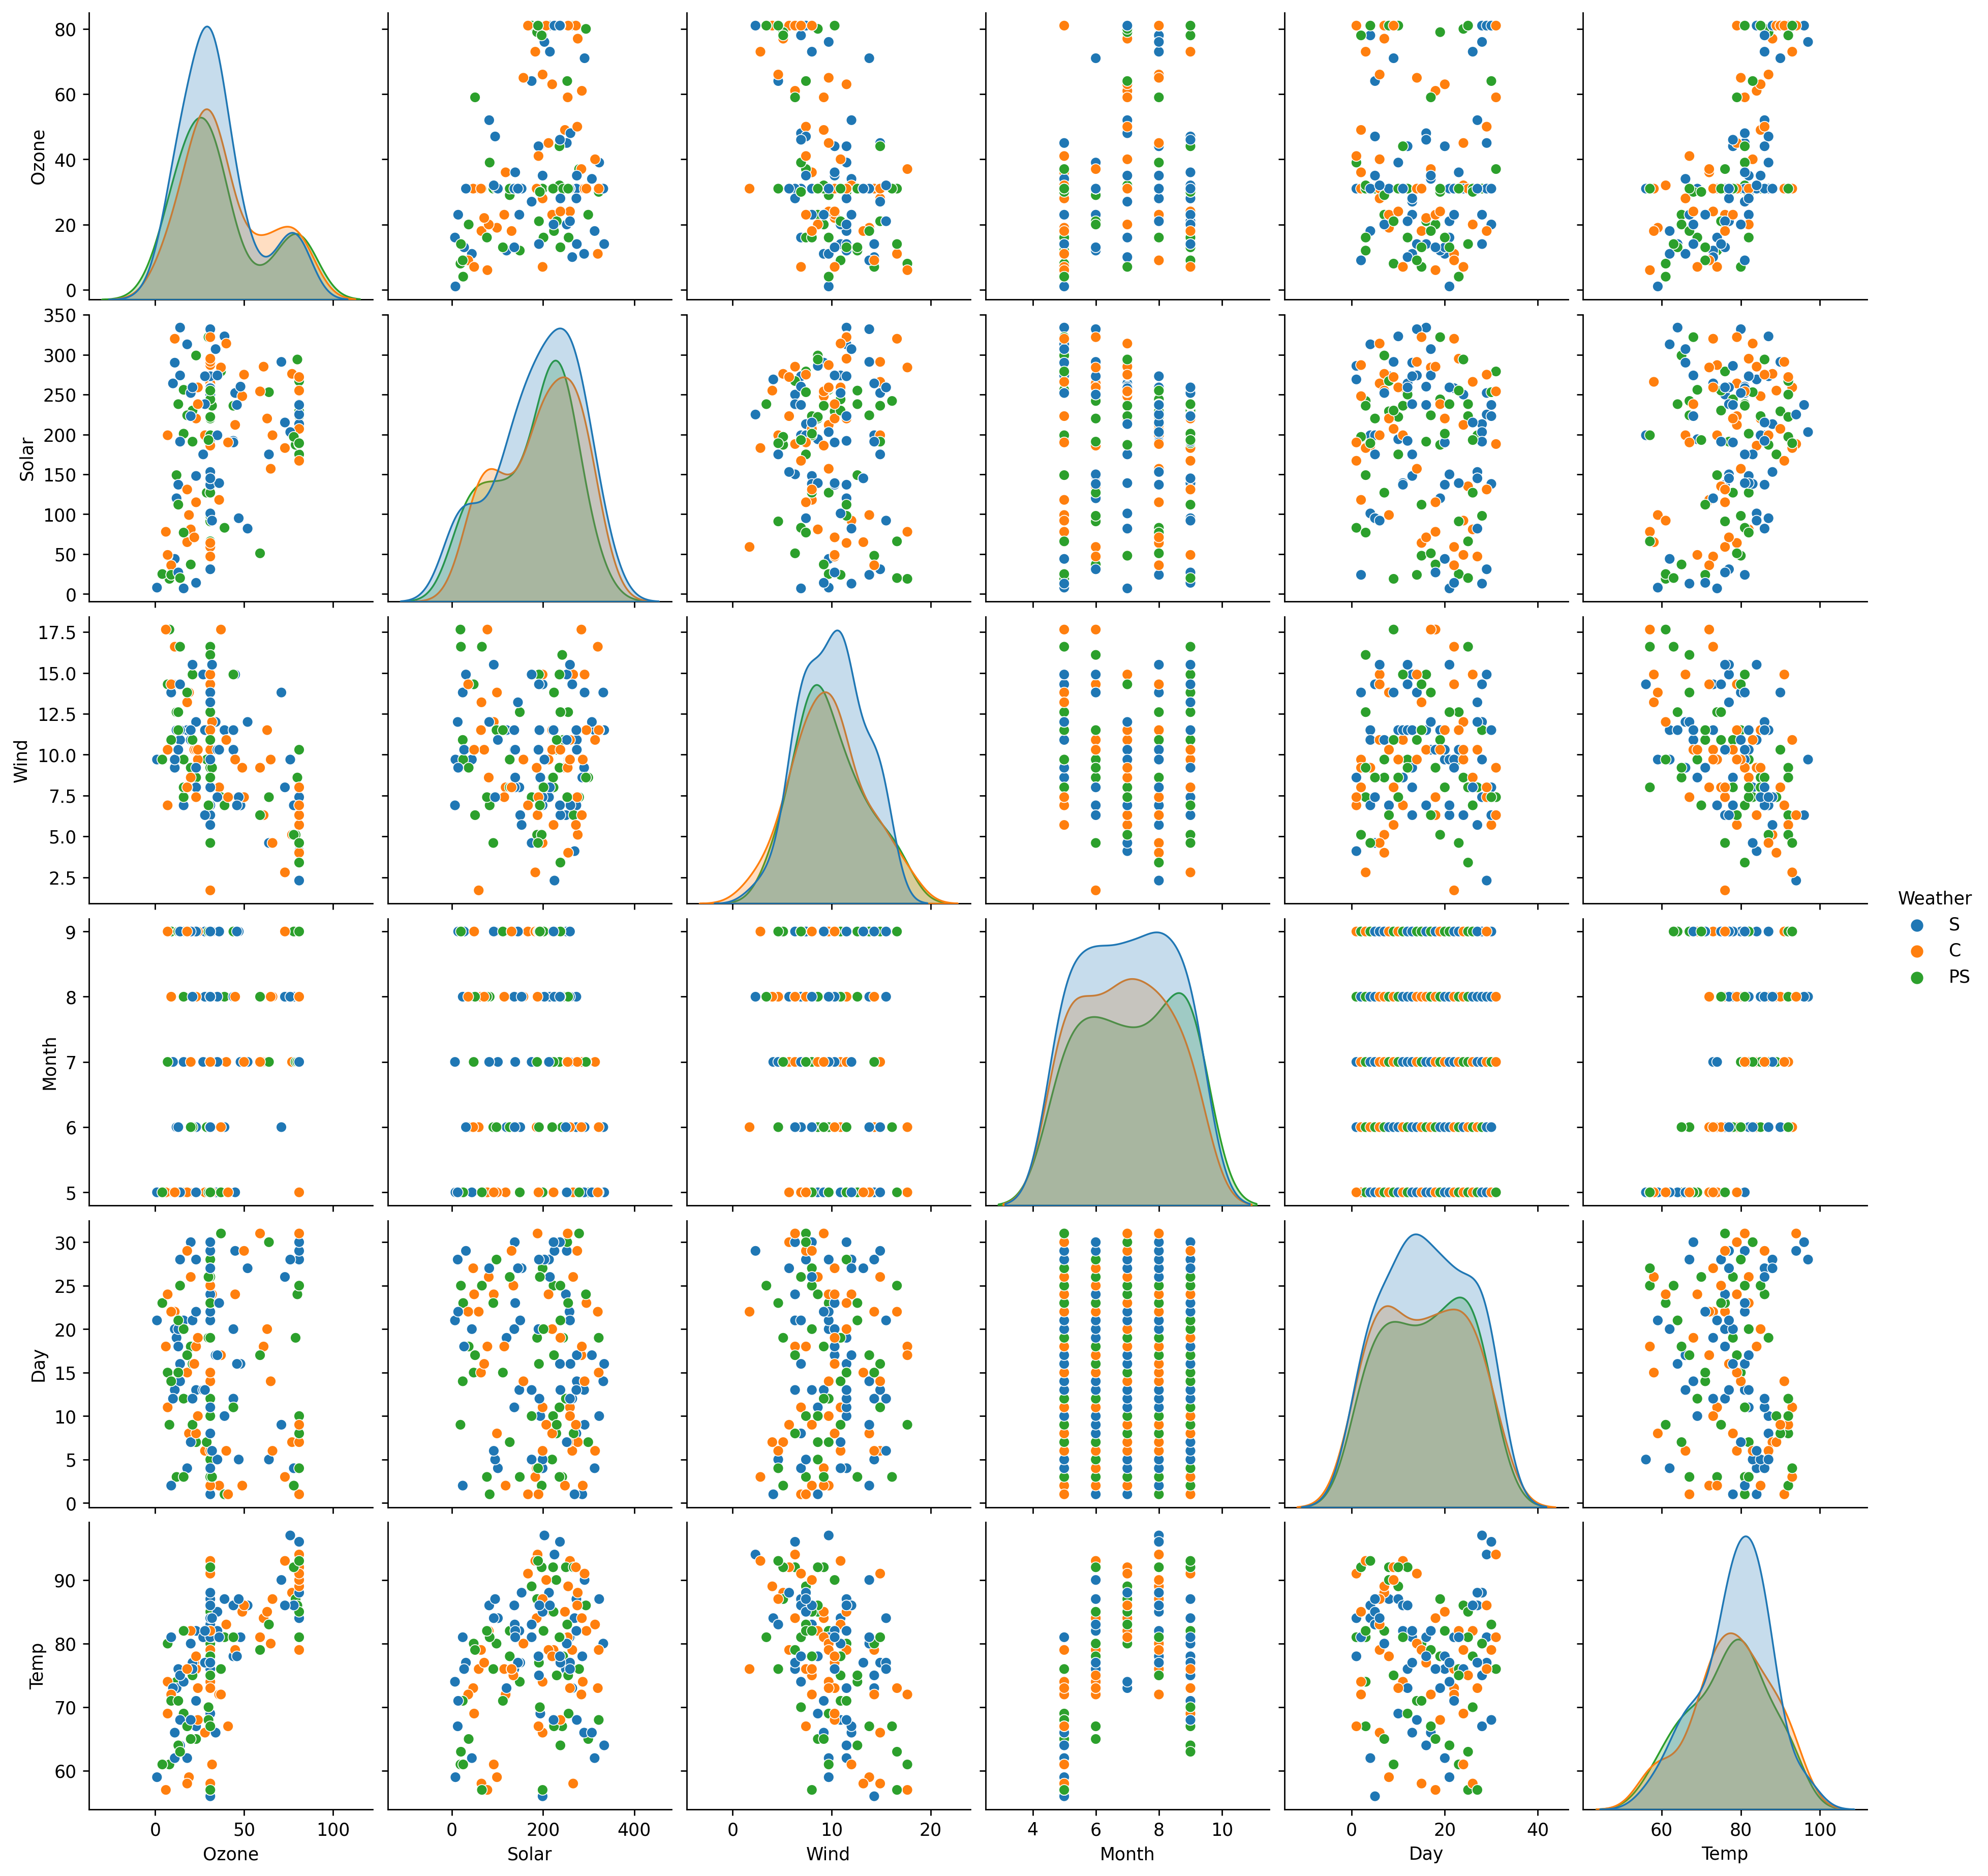

In [69]:
sns.pairplot(df,hue = 'Weather')

In [70]:
#Correlation coefficient

In [71]:
df.corr()

Ozone     Solar      Wind     Month       Day      Temp
Ozone  1.000000  0.318600 -0.522513  0.183089 -0.042835  0.662773
Solar  0.318600  1.000000 -0.055345 -0.083788 -0.156243  0.256994
Wind  -0.522513 -0.055345  1.000000 -0.162988  0.033374 -0.439939
Month  0.183089 -0.083788 -0.162988  1.000000  0.041438  0.408060
Day   -0.042835 -0.156243  0.033374  0.041438  1.000000 -0.122787
Temp   0.662773  0.256994 -0.439939  0.408060 -0.122787  1.000000

<AxesSubplot:>

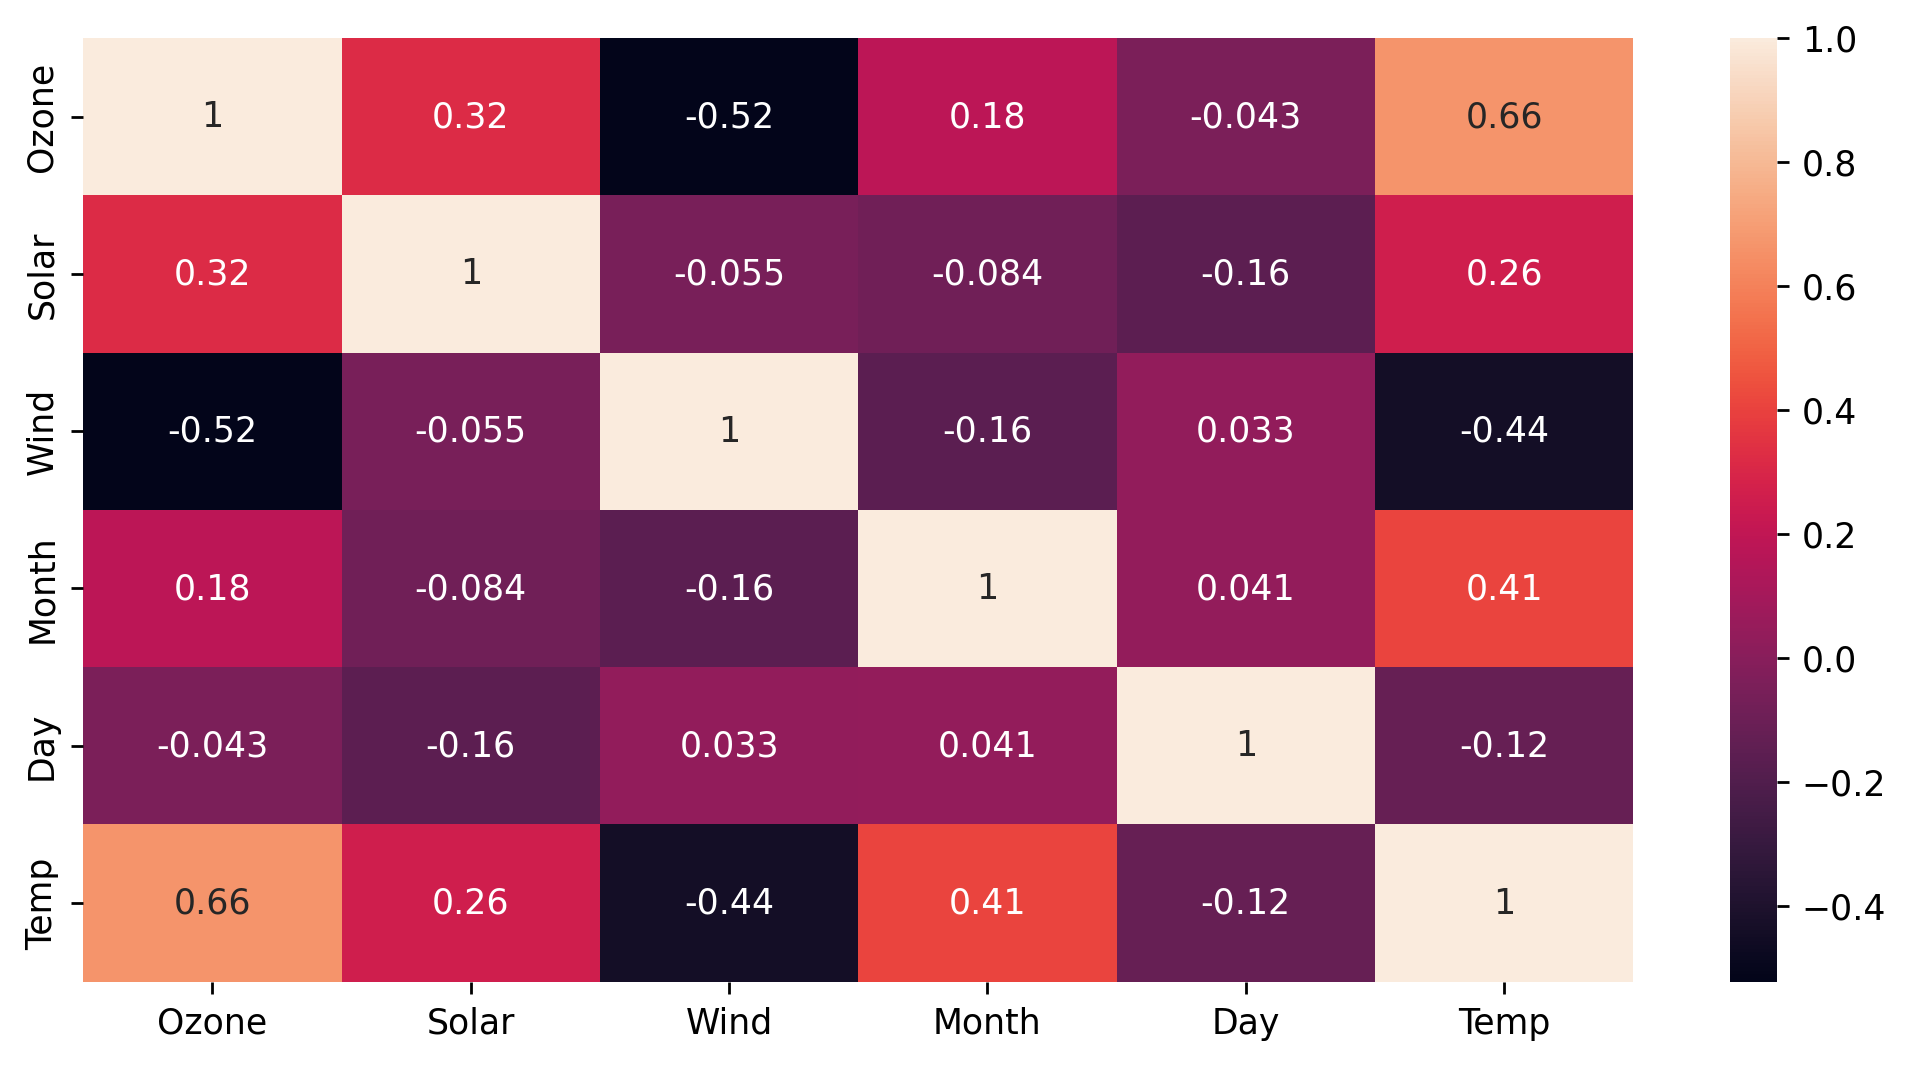

In [72]:
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:xlabel='Ozone', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Solar', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Wind', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Month', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Day', ylabel='Ozone'>,
        <AxesSubplot:xlabel='Temp', ylabel='Ozone'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Solar'>,
        <AxesSubplot:xlabel='Solar', ylabel='Solar'>,
        <AxesSubplot:xlabel='Wind', ylabel='Solar'>,
        <AxesSubplot:xlabel='Month', ylabel='Solar'>,
        <AxesSubplot:xlabel='Day', ylabel='Solar'>,
        <AxesSubplot:xlabel='Temp', ylabel='Solar'>],
       [<AxesSubplot:xlabel='Ozone', ylabel='Wind'>,
        <AxesSubplot:xlabel='Solar', ylabel='Wind'>,
        <AxesSubplot:xlabel='Wind', ylabel='Wind'>,
        <AxesSubplot:xlabel='Month', ylabel='Wind'>,
        <AxesSubplot:xlabel='Day', ylabel='Wind'>,
        <AxesSubplot:xlabel='Temp', ylabel='Wind'>],
       [<AxesSubplot:xlabel='Ozone', ylabel

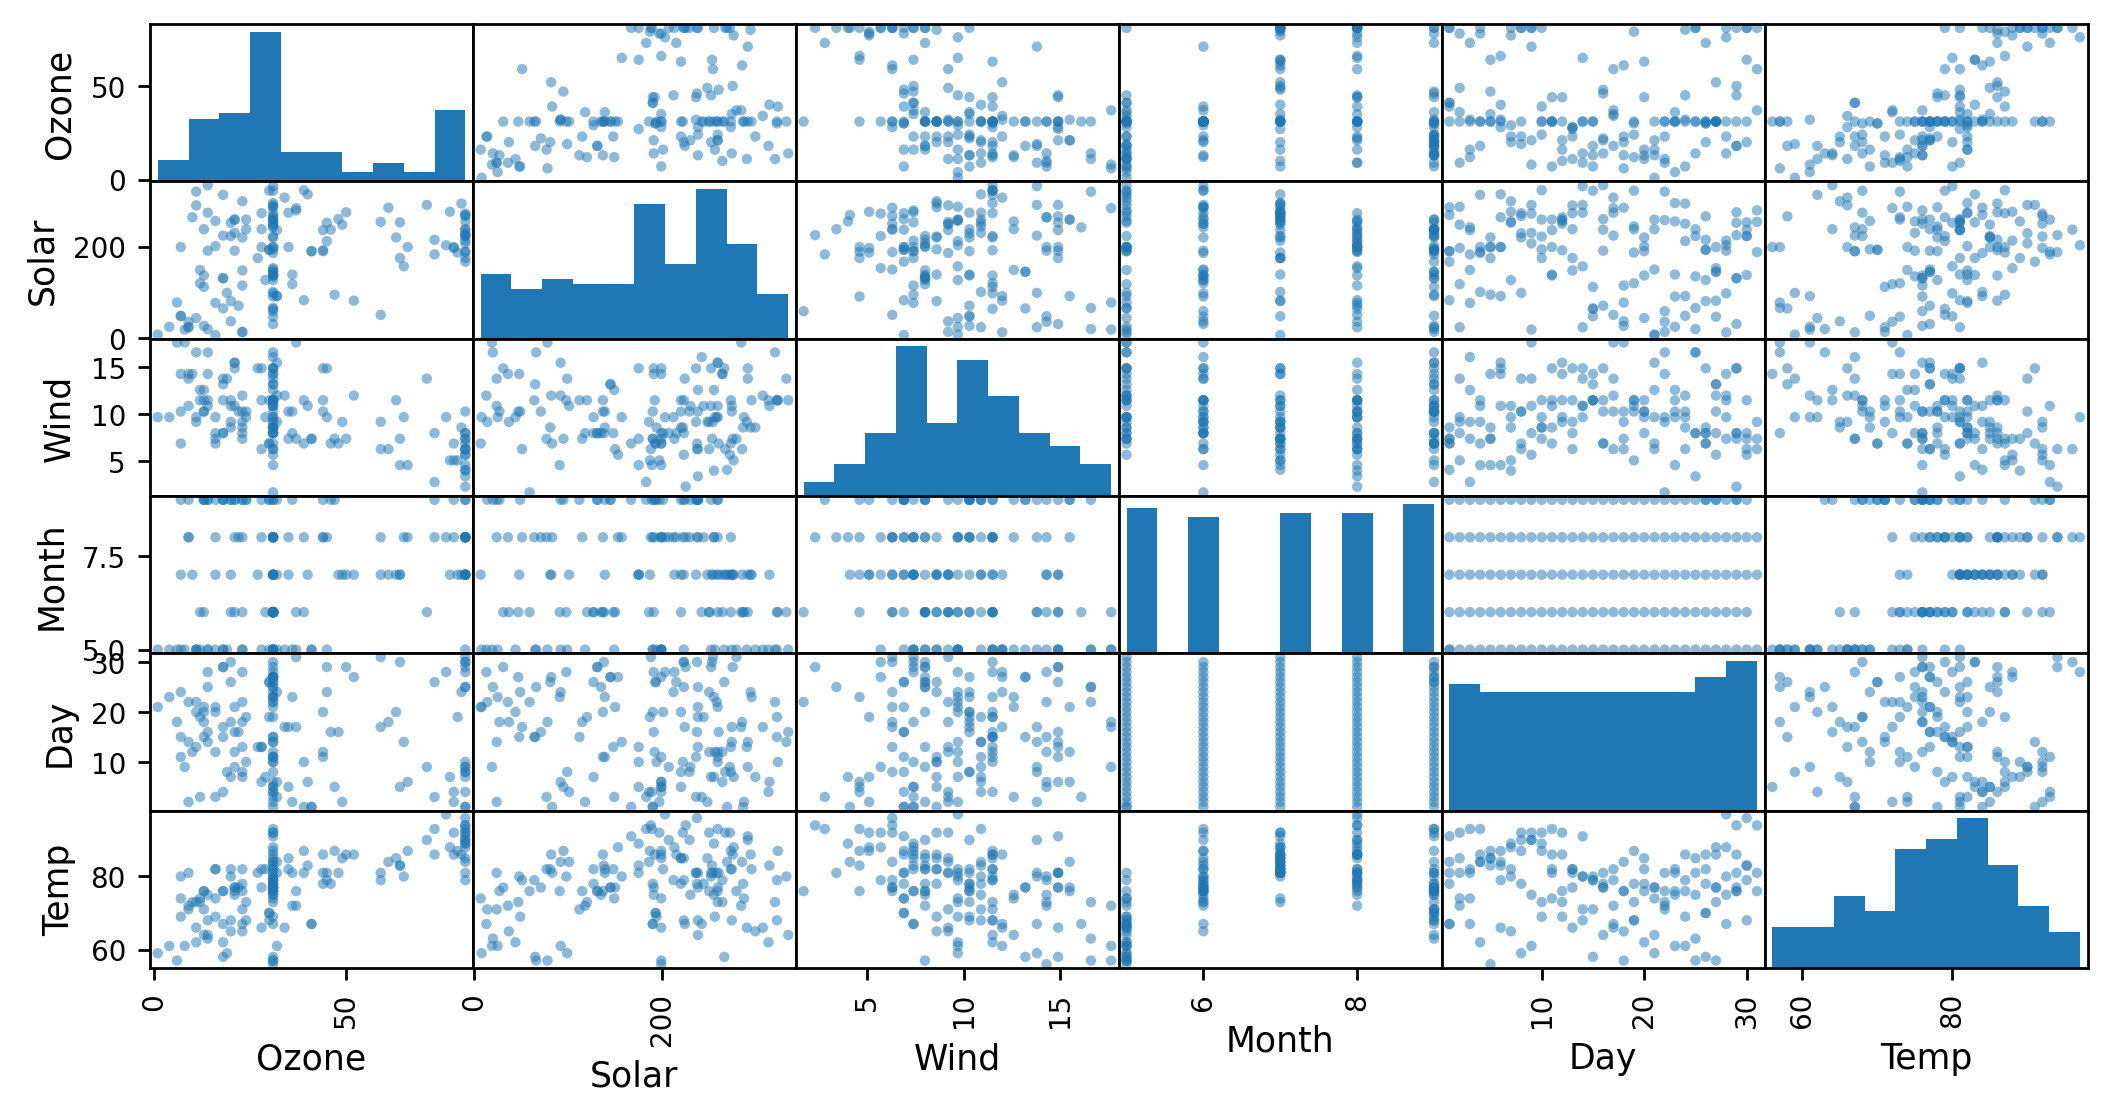

In [73]:
pd.plotting.scatter_matrix(df)

# Transformations

- Machines do not understand words and sentences.
- Machines only understand numbers.
- Before model building, we have convert all the categorical columns into numerical.

In [74]:
df.head()

Ozone  Solar  Wind  Month  Day  Temp Weather
1   41.0  190.0   7.4    5.0  1.0  67.0       S
2   36.0  118.0   8.0    5.0  2.0  72.0       C
3   12.0  149.0  12.6    5.0  3.0  74.0      PS
4   18.0  313.0  11.5    5.0  4.0  62.0       S
5   31.0  199.0  14.3    5.0  5.0  56.0       S

In [75]:
#Encoding using pandas dummy function.

In [76]:
df = pd.get_dummies(data=df,columns=['Weather'])

In [77]:
df

Ozone  Solar  Wind  Month   Day  Temp  Weather_C  Weather_PS  Weather_S
1     41.0  190.0   7.4    5.0   1.0  67.0          0           0          1
2     36.0  118.0   8.0    5.0   2.0  72.0          1           0          0
3     12.0  149.0  12.6    5.0   3.0  74.0          0           1          0
4     18.0  313.0  11.5    5.0   4.0  62.0          0           0          1
5     31.0  199.0  14.3    5.0   5.0  56.0          0           0          1
..     ...    ...   ...    ...   ...   ...        ...         ...        ...
153   20.0  223.0  11.5    9.0  30.0  68.0          0           0          1
154   41.0  190.0   7.4    5.0   1.0  67.0          1           0          0
155   30.0  193.0   6.9    9.0  26.0  70.0          0           1          0
156   31.0  145.0  13.2    9.0  27.0  77.0          0           0          1
158   18.0  131.0   8.0    9.0  29.0  76.0          1           0          0

[157 rows x 9 columns]

# **Scaling the data**

- Normalization
    - Scales value within the range of 0 to 1.
- Standardization
    - Uses Z score for scaling.
    - Scale values in such a way that the mean = 0 and standard deviation is 1.

In [78]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [79]:
sc = StandardScaler()

In [80]:
df.head()

Ozone  Solar  Wind  Month  Day  Temp  Weather_C  Weather_PS  Weather_S
1   41.0  190.0   7.4    5.0  1.0  67.0          0           0          1
2   36.0  118.0   8.0    5.0  2.0  72.0          1           0          0
3   12.0  149.0  12.6    5.0  3.0  74.0          0           1          0
4   18.0  313.0  11.5    5.0  4.0  62.0          0           0          1
5   31.0  199.0  14.3    5.0  5.0  56.0          0           0          1

In [81]:
scaled_df = pd.DataFrame(sc.fit_transform(df),columns=df.columns)

In [82]:
scaled_df

Ozone     Solar      Wind     Month       Day      Temp  Weather_C  \
0    0.190194  0.046394 -0.734593 -1.412198 -1.668937 -1.146116  -0.673575   
1   -0.032978 -0.783413 -0.557592 -1.412198 -1.557152 -0.612802   1.484615   
2   -1.104203 -0.426135  0.799418 -1.412198 -1.445367 -0.399476  -0.673575   
3   -0.836397  1.463982  0.474916 -1.412198 -1.333583 -1.679431  -0.673575   
4   -0.256150  0.150120  1.300922 -1.412198 -1.221798 -2.319408  -0.673575   
..        ...       ...       ...       ...       ...       ...        ...   
152 -0.747128  0.426722  0.474916  1.385469  1.572816 -1.039454  -0.673575   
153  0.190194  0.046394 -0.734593 -1.412198 -1.668937 -1.146116   1.484615   
154 -0.300784  0.080969 -0.882094  1.385469  1.125678 -0.826128  -0.673575   
155 -0.256150 -0.472236  0.976420  1.385469  1.237462 -0.079488  -0.673575   
156 -0.836397 -0.633587 -0.557592  1.385469  1.461032 -0.186150   1.484615   

     Weather_PS  Weather_S  
0     -0.653661    1.25450  
1     -0.653661   -0.79713  
2      1.529845   -0.79713  
3     -0.653661    1.25450  
4     -0.653661    1.25450  
..          ...        ...  
152   -0.653661    1.25450  
153   -0.653661   -0.79713  
154    1.529845   -0.79713  
155   -0.653661    1.25450  
156   -0.653661   -0.79713  

[157 rows x 9 columns]

In [83]:
scaled_df.describe()

Ozone         Solar          Wind         Month           Day  \
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02   
mean  -1.640584e-16 -1.350653e-16  1.739585e-16  1.272867e-15  5.657187e-18   
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00   
min   -1.595181e+00 -2.062700e+00 -2.416106e+00 -1.412198e+00 -1.668937e+00   
25%   -7.024938e-01 -6.796874e-01 -7.345931e-01 -7.127815e-01 -8.864446e-01   
50%   -2.561501e-01  1.501200e-01 -5.608800e-02 -1.336465e-02  7.832041e-03   
75%    3.687310e-01  7.955257e-01  4.749160e-01  6.860522e-01  9.021087e-01   
max    1.975568e+00  1.706009e+00  2.289180e+00  1.385469e+00  1.684601e+00   

               Temp     Weather_C    Weather_PS     Weather_S  
count  1.570000e+02  1.570000e+02  1.570000e+02  1.570000e+02  
mean   2.642967e-16  4.667180e-17  8.485781e-18 -7.283629e-17  
std    1.003200e+00  1.003200e+00  1.003200e+00  1.003200e+00  
min   -2.319408e+00 -6.735753e-01 -6.536610e-01 -7.971303e-01  
25%   -6.128020e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
50%    1.338381e-01 -6.735753e-01 -6.536610e-01 -7.971303e-01  
75%    6.671525e-01  1.484615e+00  1.529845e+00  1.254500e+00  
max    2.053770e+00  1.484615e+00  1.529845e+00  1.254500e+00

In [84]:
minmax = MinMaxScaler()

In [85]:
norm_df = pd.DataFrame(minmax.fit_transform(df),columns=df.columns)
norm_df

Ozone     Solar      Wind  Month       Day      Temp  Weather_C  \
0    0.5000  0.559633  0.357367    0.0  0.000000  0.268293        0.0   
1    0.4375  0.339450  0.394984    0.0  0.033333  0.390244        1.0   
2    0.1375  0.434251  0.683386    0.0  0.066667  0.439024        0.0   
3    0.2125  0.935780  0.614420    0.0  0.100000  0.146341        0.0   
4    0.3750  0.587156  0.789969    0.0  0.133333  0.000000        0.0   
..      ...       ...       ...    ...       ...       ...        ...   
152  0.2375  0.660550  0.614420    1.0  0.966667  0.292683        0.0   
153  0.5000  0.559633  0.357367    0.0  0.000000  0.268293        1.0   
154  0.3625  0.568807  0.326019    1.0  0.833333  0.341463        0.0   
155  0.3750  0.422018  0.721003    1.0  0.866667  0.512195        0.0   
156  0.2125  0.379205  0.394984    1.0  0.933333  0.487805        1.0   

     Weather_PS  Weather_S  
0           0.0        1.0  
1           0.0        0.0  
2           1.0        0.0  
3           0.0        1.0  
4           0.0        1.0  
..          ...        ...  
152         0.0        1.0  
153         0.0        0.0  
154         1.0        0.0  
155         0.0        1.0  
156         0.0        0.0  

[157 rows x 9 columns]

In [86]:
norm_df.describe()

Ozone       Solar        Wind       Month         Day        Temp  \
count  157.000000  157.000000  157.000000  157.000000  157.000000  157.000000   
mean     0.446736    0.547323    0.513488    0.504777    0.497665    0.530371   
std      0.280949    0.266192    0.213207    0.358584    0.299147    0.229398   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.250000    0.366972    0.357367    0.250000    0.233333    0.390244   
50%      0.375000    0.587156    0.501567    0.500000    0.500000    0.560976   
75%      0.550000    0.758410    0.614420    0.750000    0.766667    0.682927   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

        Weather_C  Weather_PS   Weather_S  
count  157.000000  157.000000  157.000000  
mean     0.312102    0.299363    0.388535  
std      0.464834    0.459445    0.488977  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      1.000000    1.000000    1.000000  
max      1.000000    1.000000    1.000000

# Speed up the EDA process

In [87]:
#!pip install pandas-profiling==3.1.0
#!pip install sweetviz

In [88]:
import pandas_profiling as pp
import sweetviz as sv

C:\Users\admin\AppData\Local\Temp/ipykernel_12100/326613757.py:1: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  import pandas_profiling as pp


In [92]:
df = pd.read_csv('https://raw.githubusercontent.com/amrutagavhane/Weather_Report/main/weather_report.csv', index_col=0)
df

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1     41.0    190.0   7.4     67     5    1  2010    67       S
2     36.0    118.0   8.0     72     5    2  2010    72       C
3     12.0    149.0  12.6     74     5    3  2010    74      PS
4     18.0    313.0  11.5     62     5    4  2010    62       S
5      NaN      NaN  14.3     56     5    5  2010    56       S
..     ...      ...   ...    ...   ...  ...   ...   ...     ...
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 9 columns]

In [93]:
# pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

- For a dataset with less elements than a given number (say 5), pandas-profiling assumes that your variable is categorical instead of numerical.

In [94]:
EDA_report = pp.ProfileReport(df,title="Pandas Profiling Report",vars=dict(num={"low_categorical_threshold": 0}))
EDA_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [95]:
df

Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
1     41.0    190.0   7.4     67     5    1  2010    67       S
2     36.0    118.0   8.0     72     5    2  2010    72       C
3     12.0    149.0  12.6     74     5    3  2010    74      PS
4     18.0    313.0  11.5     62     5    4  2010    62       S
5      NaN      NaN  14.3     56     5    5  2010    56       S
..     ...      ...   ...    ...   ...  ...   ...   ...     ...
154   41.0    190.0   7.4     67     5    1  2010    67       C
155   30.0    193.0   6.9     70     9   26  2010    70      PS
156    NaN    145.0  13.2     77     9   27  2010    77       S
157   14.0    191.0  14.3     75     9   28  2010    75       S
158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 9 columns]

In [96]:
EDA_report.to_file(output_file='report2.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [97]:
sweet_report = sv.analyze(df)

                                             |          | [  0%]   00:00 -> (? left)

In [98]:
sweet_report

In [99]:
sweet_report.show_html('weather_report.html')

Report weather_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.
